Christopher Rudolph - 45241805 - MQ University

# W9 workshop information



predictive model $\neq$ clustering

- atleast understand some relationships between the numeric variables and the target.
- can just fit any model, but check other classifers in sklearn classifiers. logreg, NB, LR. The website will have examples. 
- make a comparison between the models. 
- consider the features you include and dont include. why are you including them? Did you notice a trend somewhere? 
- evaluation of models: Address overfitting. 
- train, test, validate split is good for hyperparameter tuning. use the validation set at the end. if the results arent' good then it would be best to re split and do the model again. Even if the results are good should still do it again. 
- w6 false positive matrix 
- if we found that most customers churn, we can say all customers churn with 95% accuracy
- phone brand: check out one hot encoding. better to use this method for logreg
- better to use one hot encoding when there are more than 2 categories.
- https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
- ctract_status use one hot encoding 
- try plotting in the exploration. see if there are any relationships between churning and other features

# w10 workshop information

Supervised learning : we know what we're trying to predict. We're trying to predict if someone churn or not. This is a classification, not a value. So we will use classifcation models. 

Unsupervised learning: we dont know what we're trying to predict. We don't have a label to predict. 

Regression model: predicts a number. 

reporting accuracy over MSE is better. 

Which features provide the most accurate results? compare the features and do an analysis. 

consider the drop off from training and testing accuracy to determine overfitting. 

KNN LOOKS LIKE CLUSTERING BUT ITS NOT. knn is setting up classification within the data. 
http://vision.stanford.edu/teaching/cs231n-demos/knn/

# Mobile Customer Churn

## Notes: 

In this Portfolio task you will work with some (fake but realistic) data on Mobile Customer Churn.  Churn is where
a customer leaves the mobile provider.   The goal is to build a simple predictive model to predict churn from available features. 

The data was generated (by Hume Winzar at Macquarie) based on a real dataset provided by Optus.  The data is simulated but the column headings are the same. (Note that I'm not sure if all of the real relationships in this data are preserved so you need to be cautious in interpreting the results of your analysis here).  

The data is provided in file `MobileCustomerChurn.csv` and column headings are defined in a file `MobileChurnDataDictionary.csv` (store these in the `files` folder in your project).

Your high level goal in this notebook is to try to build and evaluate a __predictive model for churn__ - predict the value of the CHURN_IND field in the data from some of the other fields.  Note that the three `RECON` fields should not be used as they indicate whether the customer reconnected after having churned. 

__Note:__ you are not being evaluated on the _accuracy_ of the model but on the _process_ that you use to generate it.  You can use a simple model such as Logistic Regression for this task or try one of the more advanced methods covered in recent weeks.  Explore the data, build a model using a selection of features and then do some work on finding out which features provide the most accurate results.  

- Churn is when a customer leaves a provider.
- we're building a model to predict churn with given features. 
- be cautious when interpreting reuslts, preservation of data relationships is unknown. 
- `RECON` should not be used, this means a customer has reconnected after churn 

**Column definitions**

*CUST_ID*: customer identifier

*ACCOUNT_TENURE*: how long the account has been active.

*ACCT_CNT_SERVICES*: Total number of services under an account

*CFU*: type of customer

*SERVICE_TENURE*: How many more months the service is active

*PLAN_ACCESS_FEE*: account monthly fee

*BYO_PLAN_STATUS*: Whether customer is on a 'bring your own' plan.

*PLAN_TENURE*: Plan tenure in months, how many months remain.

*MONTHS_OF_CONTRACT_REMAINING* : Contract tenure remaining based on months of contract completed 

*LAST_FX_CONTRACT_DURATION*: last known  fixed contract term

*CONTRACT_STATUS*: no-contract, off-contract or on-contract.

*PREV_CONTRACT_DURATION*: previous contract term. 

*HANDSET_USED_BRAND*: Brand of the mobile phone the customer is using.

*CHURN_IND*: Whether a customer hs churned or not. 

*MONTHLY_SPEND*: Customer's monthly spending

*COUNTRY_METRO_REGION* : region of customer, country or metro. 

*STATE*: Customer's registered State

## Setting up the DF

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings("ignore")

In [2]:
churn = pd.read_csv("files/MobileCustomerChurn.csv", na_values=["NA", "#VALUE!"], index_col='INDEX')
churn.head()

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,...,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,RECON_SMS_NEXT_MTH,RECON_TELE_NEXT_MTH,RECON_EMAIL_NEXT_MTH
INDEX,,,,,,,,,,,,,,,,,,,,,
1,1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,...,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA,NaN,NaN,NaN
2,2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,...,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW,NaN,NaN,NaN
3,5,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,...,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA,NaN,NaN,NaN
4,6,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,...,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC,NaN,NaN,NaN
5,8,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,...,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW,NaN,NaN,NaN


Removing the `RECON` fields as per the directions of the task. 

In [3]:
churn = churn.drop(columns=['RECON_SMS_NEXT_MTH','RECON_TELE_NEXT_MTH','RECON_EMAIL_NEXT_MTH'])

Changing the columns to lower case for ease of referencing

In [4]:
churn.columns = churn.columns.str.lower()

Dropping `cust_id` as we don't want to identify customers, nor is it important in this task as a feature. Even though the cust_id may be an internal identifier, it's still possible the external information could be leaked with the cust_id.

In [5]:
churn= churn.drop(columns='cust_id')

Setting up one hot encoding for CONTRACT_STATUS and handset_brand_used

help from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

https://stackoverflow.com/questions/58101126/using-scikit-learn-onehotencoder-with-a-pandas-dataframe

Easier to use `pd.get_dummies()` instead of one hot encoding

https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/

Help for sorting out the prefix created by `get_dummies()` https://stackoverflow.com/questions/55830212/remove-prefix-in-all-column-names

In [6]:
y = pd.get_dummies(churn[['contract_status','handset_used_brand','state']],prefix ='')
y.columns = y.columns.str.replace('_', '')


In [7]:
y.head()

,NO-CONTRACT,OFF-CONTRACT,ON-CONTRACT,APPLE,GOOGLE,HUAWEI,OTHER,SAMSUNG,UNKNOWN,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
INDEX,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [8]:
churn_ohe = pd.concat([churn, y], axis=1).drop(['contract_status','handset_used_brand','state'], axis=1)

In [9]:
churn_ohe.head()

,account_tenure,acct_cnt_services,age,cfu,service_tenure,plan_access_fee,byo_plan_status,plan_tenure,months_of_contract_remaining,last_fx_contract_duration,...,SAMSUNG,UNKNOWN,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
INDEX,,,,,,,,,,,,,,,,,,,,,
1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,24,...,1,0,0,0,0,0,0,0,0,1
2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,24,...,0,0,0,1,0,0,0,0,0,0
3,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,12,...,0,0,0,0,0,0,0,0,0,1
4,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,24,...,0,0,0,0,0,0,0,0,1,0
5,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,24,...,0,0,0,1,0,0,0,0,0,0


Finding any NAN values

In [10]:
churn.isnull().any()

account_tenure                  False
acct_cnt_services               False
age                              True
cfu                             False
service_tenure                  False
plan_access_fee                 False
byo_plan_status                 False
plan_tenure                     False
months_of_contract_remaining    False
last_fx_contract_duration       False
contract_status                 False
prev_contract_duration          False
handset_used_brand              False
churn_ind                       False
monthly_spend                   False
country_metro_region             True
state                            True
dtype: bool

In [11]:
naColumns = list((churn.isnull().any())[(churn.isnull().any())==True].index)

In [12]:
naColumns

['age', 'country_metro_region', 'state']

In [13]:
churn[churn[naColumns[0]].isna()].head()

,account_tenure,acct_cnt_services,age,cfu,service_tenure,plan_access_fee,byo_plan_status,plan_tenure,months_of_contract_remaining,last_fx_contract_duration,contract_status,prev_contract_duration,handset_used_brand,churn_ind,monthly_spend,country_metro_region,state
INDEX,,,,,,,,,,,,,,,,,
186,94,2,NaN,SMALL BUSINESS,94,45.44,NON BYO,27,0,24,OFF-CONTRACT,24,HUAWEI,1,51.79,COUNTRY,NSW
213,39,4,NaN,SMALL BUSINESS,1,36.36,NON BYO,1,0,0,NO-CONTRACT,0,SAMSUNG,1,48.37,METRO,NSW
2047,4,2,NaN,SMALL BUSINESS,4,72.72,NON BYO,4,20,24,ON-CONTRACT,0,SAMSUNG,1,72.72,METRO,ACT
2560,8,4,NaN,SMALL BUSINESS,8,27.27,BYO,5,0,0,NO-CONTRACT,0,APPLE,1,37.66,METRO,VIC
4129,9,3,NaN,SMALL BUSINESS,9,72.72,NON BYO,9,15,24,ON-CONTRACT,0,APPLE,1,72.72,METRO,NSW


In [14]:
churn[churn[naColumns[1]].isna()].head()

,account_tenure,acct_cnt_services,age,cfu,service_tenure,plan_access_fee,byo_plan_status,plan_tenure,months_of_contract_remaining,last_fx_contract_duration,contract_status,prev_contract_duration,handset_used_brand,churn_ind,monthly_spend,country_metro_region,state
INDEX,,,,,,,,,,,,,,,,,
23119,94,1,52.0,CONSUMER,194,72.72,NON BYO,3,21,24,ON-CONTRACT,24,APPLE,0,72.72,NaN,NaN


In [15]:
churn[churn[naColumns[2]].isna()].head()

,account_tenure,acct_cnt_services,age,cfu,service_tenure,plan_access_fee,byo_plan_status,plan_tenure,months_of_contract_remaining,last_fx_contract_duration,contract_status,prev_contract_duration,handset_used_brand,churn_ind,monthly_spend,country_metro_region,state
INDEX,,,,,,,,,,,,,,,,,
23119,94,1,52.0,CONSUMER,194,72.72,NON BYO,3,21,24,ON-CONTRACT,24,APPLE,0,72.72,NaN,NaN


Considering there is only a total of 73 rows with NA values, we can remove them as they won't have a significant impact on the rest of the data. 

In [16]:
churn_clean = churn.drop(index=list(churn[churn[naColumns[0]].isna()].index))
churn_clean = churn_clean.drop(index=23119)

churn_oheClean = churn_ohe.drop(index=list(churn[churn[naColumns[0]].isna()].index))
churn_oheClean = churn_oheClean.drop(index=23119)

## Exploring the DF

Checking what the `cfu` column contains

In [17]:
set(list(churn['cfu']))

{'CONSUMER', 'SMALL BUSINESS'}

In [18]:
len(churn[churn['cfu'] == 'CONSUMER'])

39087

In [19]:
len(churn[churn['cfu'] == 'SMALL BUSINESS'])

7119

In [20]:
round((len(churn[churn['cfu'] == 'SMALL BUSINESS']) / len(churn))*100, 2)

15.41

Small business account for about 15% of all the accounts, therefore consumers equate to about 75% for all the accounts

In [21]:
round((len(churn[churn['byo_plan_status'] == 'BYO']) / len(churn))*100, 2)

23.22

About 23% of all the accounts are BYO plan status

About 34% of all accounts have different `account_tenure` to `service_tenure`. What does it mean if these two differ? 

In [22]:
round((len(churn[(churn['account_tenure'] == churn['service_tenure']) == False]) / len(churn))*100, 2)

33.82

In [23]:
total = len(churn)
greater = round( 100*(len(churn[churn['account_tenure'] > churn['service_tenure']])/total),2)
lesser = round( 100*(len(churn[churn['account_tenure'] < churn['service_tenure']])/total),2)
equal = round((len(churn[(churn['account_tenure'] == churn['service_tenure']) == True]) / len(churn))*100, 2)

Checking they all add up

In [24]:
greater + lesser + equal

100.0

In [25]:
print(f'account_tenure > service_tenure = {greater}%')
print(f'account_tenure < service_tenure = {lesser}%')
print(f'account_tenure = service_tenure = {equal}%')

account_tenure > service_tenure = 18.19%
account_tenure < service_tenure = 15.63%
account_tenure = service_tenure = 66.18%


In [26]:
greater2 = round( 100*(len(churn[churn['account_tenure'] > churn['plan_tenure']])/total),2)
lesser2 = round( 100*(len(churn[churn['account_tenure'] < churn['plan_tenure']])/total),2)
equal2 = round((len(churn[(churn['account_tenure'] == churn['plan_tenure']) == True]) / len(churn))*100, 2)

In [27]:
print(f'account_tenure > plan_tenure = {greater2}%')
print(f'account_tenure < plan_tenure = {lesser2}%')
print(f'account_tenure = plan_tenure = {equal2}%')

account_tenure > plan_tenure = 72.29%
account_tenure < plan_tenure = 0.04%
account_tenure = plan_tenure = 27.67%


In [28]:
greater3= round( 100*(len(churn[churn['service_tenure'] > churn['plan_tenure']])/total),2)
lesser3 = round( 100*(len(churn[churn['service_tenure'] < churn['plan_tenure']])/total),2)
equal3 = round((len(churn[(churn['service_tenure'] == churn['plan_tenure']) == True]) / len(churn))*100, 2)

In [29]:
print(f'service_tenure > plan_tenure = {greater3}%')
print(f'service_tenure < plan_tenure = {lesser3}%')
print(f'service_tenure = plan_tenure = {equal3}%')

service_tenure > plan_tenure = 64.09%
service_tenure < plan_tenure = 0.0%
service_tenure = plan_tenure = 35.91%


Checking if there are any correlations between the 3 tenures 

In [30]:
tenureList = ['account_tenure','service_tenure','plan_tenure']

In [31]:
churn[tenureList].corr()

,account_tenure,service_tenure,plan_tenure
account_tenure,1.000000,0.791784,0.247583
service_tenure,0.791784,1.000000,0.218260
plan_tenure,0.247583,0.218260,1.000000


<AxesSubplot:>

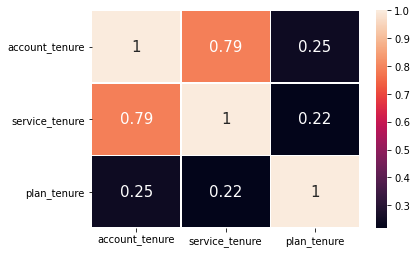

In [32]:
sns.heatmap((churn[tenureList].corr()), linewidths = 0.5, annot=True, annot_kws={"fontsize":15})

There is a high correlation between `account_tenure` and `service_tenure`. Checking the correlation of the two tenures with the rest of the features of the data. The following cell has chosen only columns with number types, displaying the tenures of interest. We can easily compare the correlations of the two tenures with the other features.

In [33]:
(churn.select_dtypes(['number']).corr().loc[['account_tenure','service_tenure']])

,account_tenure,acct_cnt_services,age,service_tenure,plan_access_fee,plan_tenure,months_of_contract_remaining,last_fx_contract_duration,prev_contract_duration,churn_ind,monthly_spend
account_tenure,1.000000,0.196271,0.250492,0.791784,-0.08516,0.247583,-0.170644,0.176972,0.503690,-0.151654,-0.137805
service_tenure,0.791784,0.068398,0.251711,1.000000,-0.07852,0.218260,-0.143886,0.139710,0.410986,-0.153512,-0.115622


In nearly all the features, `service_tenure` has a higher correlation. Perhaps this means we should use this as a feature instead of `account_tenure`. 

Some further exploration

In [34]:
zeroRemain = round(len(churn[churn['months_of_contract_remaining'] == 0])*100/total, 2)

In [35]:
print(f'{zeroRemain}% of contracts have no remaining months in their contract')

38.79% of contracts have no remaining months in their contract


In [36]:
print(f"{round(len(churn[churn['last_fx_contract_duration'] == churn['prev_contract_duration']])*100/total,2)}% of customers had their last fixed contract as their previous contract")

75.77% of customers had their last fixed contract as their previous contract


In [37]:
print(f"{round(len(churn[(churn['churn_ind']==1)& (churn['byo_plan_status']== 'NON BYO')])*100/total,2)}% of customers who did not BYO device churned  ")

28.04% of customers who did not BYO device churned  


Creating two different DFs, one for consumers and one for business'. IT will be good though to keep them in the same DF because we can use it to plot different hues 

In [38]:
churn_c= churn[churn['cfu'] =='CONSUMER']
churn_b = churn[churn['cfu'] == 'SMALL BUSINESS']

Dropping the `cfu` column as it will no longer be needed

In [39]:
churn_c = churn_c.drop(columns=['cfu'])
churn_b = churn_b.drop(columns=['cfu'])

In [40]:
churn_b.head()

,account_tenure,acct_cnt_services,age,service_tenure,plan_access_fee,byo_plan_status,plan_tenure,months_of_contract_remaining,last_fx_contract_duration,contract_status,prev_contract_duration,handset_used_brand,churn_ind,monthly_spend,country_metro_region,state
INDEX,,,,,,,,,,,,,,,,
22,67,4,53.0,67,31.81,BYO,22,0,12,OFF-CONTRACT,12,APPLE,1,68.17,COUNTRY,NSW
23,4,1,26.0,4,72.72,NON BYO,4,20,24,ON-CONTRACT,24,OTHER,1,84.53,COUNTRY,VIC
36,58,1,41.0,58,31.81,BYO,26,0,24,OFF-CONTRACT,24,APPLE,1,38.16,METRO,VIC
40,78,1,27.0,78,53.63,NON BYO,54,0,24,OFF-CONTRACT,24,APPLE,1,3.42,METRO,NSW
44,57,1,26.0,57,27.27,BYO,9,3,12,ON-CONTRACT,24,APPLE,1,48.79,METRO,SA


<AxesSubplot:>

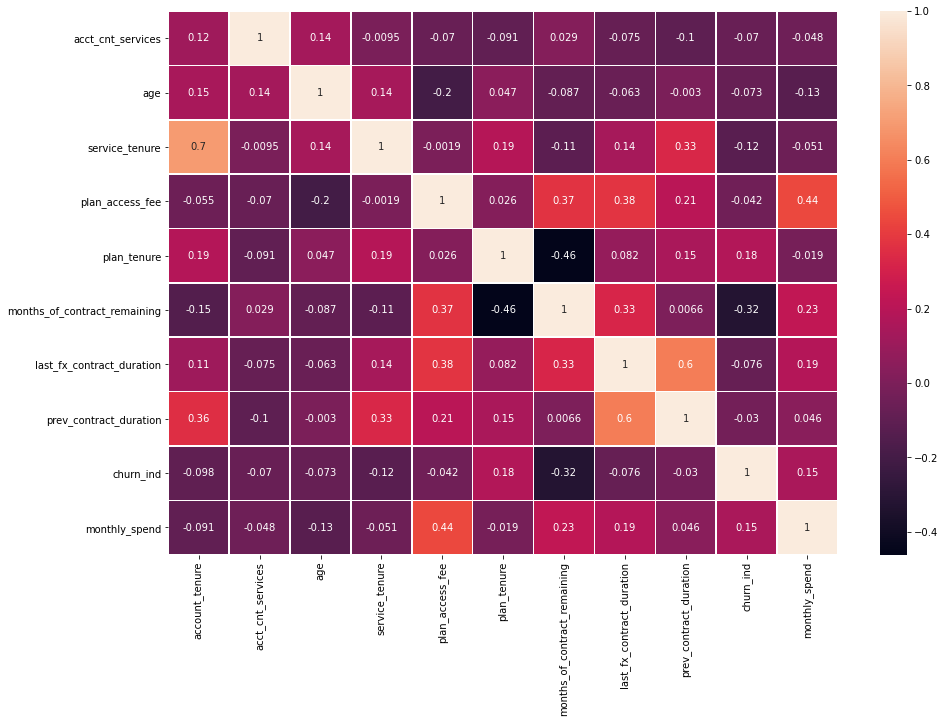

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap((churn_b.corr().drop(['account_tenure'])), linewidths = 0.5, annot=True)

Not much to deduce here, can only see that there is a high **negative** correlation between `months_of_contract_remaining` and `plan_tenure`. We can also see there is a high positive correlation between `prev_contract_duration` and `last_fx_contract_duration`. It is likely the previous contract was a fixed term contract. Most people are on fixed term contracts so this makes sense. 

Doing a `.describe()` for the columns to make sure they all are sensible.

In [42]:
churn.describe()

,account_tenure,acct_cnt_services,age,service_tenure,plan_access_fee,plan_tenure,months_of_contract_remaining,last_fx_contract_duration,prev_contract_duration,churn_ind,monthly_spend
count,46206.000000,46206.000000,46130.000000,46206.000000,46206.000000,46206.000000,46206.000000,46206.000000,46206.000000,46206.000000,46206.000000
mean,45.874627,1.555707,41.411836,50.318617,51.364858,10.846708,8.237112,20.349825,15.249968,0.385015,75.188029
std,33.077927,0.835529,15.263726,51.925537,20.855419,9.769887,8.341476,8.034631,10.982958,0.486604,73.519041
min,0.000000,1.000000,-4.000000,0.000000,8.180000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020000
25%,14.000000,1.000000,28.000000,11.000000,36.360000,3.000000,0.000000,24.000000,0.000000,0.000000,36.360000
50%,44.000000,1.000000,40.000000,35.000000,54.540000,8.000000,7.000000,24.000000,24.000000,0.000000,54.540000
75%,77.000000,2.000000,52.000000,69.000000,72.720000,16.000000,16.000000,24.000000,24.000000,1.000000,84.530000
max,120.000000,4.000000,116.000000,259.000000,234.540000,147.000000,24.000000,36.000000,36.000000,1.000000,1965.890000


We notice there is a negative value for the age. 

In [43]:
churn_clean= churn_clean.drop(index=churn_clean[churn_clean['age']<0].index)

churn_oheClean= churn_oheClean.drop(index=churn_oheClean[churn_oheClean['age'] <0].index)

Changing the categorical columns 'cfu' and 'byo_plan_status' to 0 and 1.

In [44]:
churn_clean.loc[churn_clean['cfu'] =='CONSUMER', 'cfu'] = 1
churn_clean.loc[churn_clean['cfu'] =='SMALL BUSINESS', 'cfu'] = 0

churn_clean.loc[churn_clean['byo_plan_status'] =='NON BYO', 'byo_plan_status'] = 0
churn_clean.loc[churn_clean['byo_plan_status'] =='BYO', 'byo_plan_status'] = 1

churn_clean.loc[churn_clean['country_metro_region'] =='COUNTRY', 'country_metro_region'] = 0
churn_clean.loc[churn_clean['country_metro_region'] =='METRO', 'country_metro_region'] = 1

In [45]:
churn_oheClean.loc[churn_oheClean['cfu'] =='CONSUMER', 'cfu'] = 1
churn_oheClean.loc[churn_oheClean['cfu'] =='SMALL BUSINESS', 'cfu'] = 0

churn_oheClean.loc[churn_oheClean['byo_plan_status'] =='NON BYO', 'byo_plan_status'] = 0
churn_oheClean.loc[churn_oheClean['byo_plan_status'] =='BYO', 'byo_plan_status'] = 1

churn_oheClean.loc[churn_oheClean['country_metro_region'] =='COUNTRY', 'country_metro_region'] = 0
churn_oheClean.loc[churn_oheClean['country_metro_region'] =='METRO', 'country_metro_region'] = 1

In [46]:
churn_oheClean.columns = churn_oheClean.columns.str.lower()

Checking correlation between churn ID and the newly one hot encoded values

In [47]:
(churn_oheClean.corr())['churn_ind'].sort_values(ascending=False)

churn_ind                       1.000000
off-contract                    0.210199
monthly_spend                   0.188309
plan_tenure                     0.141735
unknown                         0.096631
no-contract                     0.065634
other                           0.042704
qld                             0.021187
wa                              0.019827
huawei                          0.009599
tas                             0.004146
nt                              0.003546
google                          0.001491
nsw                            -0.000029
act                            -0.013982
vic                            -0.014587
samsung                        -0.015632
sa                             -0.024523
plan_access_fee                -0.036616
apple                          -0.048285
acct_cnt_services              -0.062352
prev_contract_duration         -0.064081
last_fx_contract_duration      -0.066558
age                            -0.115242
account_tenure  

The top 3 features that show a correlation whether a customer churns is 'off-contract', 'monthly_spend' and 'plan_tenure'. We expect the bottom features to have a low correlation as customers who are locked in a contract ('on-contract') will not be able to easily churn. Generally there are large fees involved if churn in those instances. 

From this DF exploration, we've found:
- no columns are equal. 
- not many customers had BYO plans (as expected)
- high correlation between previous contract being a fixed term contract
- significantly more consumers than small businesses (as expected)
- No significant correlations between the features and the churn_ind. 

help with `.select_dtypes` https://stackoverflow.com/questions/12725417/drop-non-numeric-columns-from-a-pandas-dataframe

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html

END OF DATA EXPLORATION

---

# Modelling

### Log Regression

Probabilistic modelling. For predicting labels instead of numeric values. Labels are usually classifcations/ classes. We're given a set of data to determine the class to a certain accuracy. 

#### `churn_oheClean`,  Applying specific features

We saw from the exploratory section of this notebook there is a a potential relationship between 'off-contract', 'monthly_spend', 'account_tenure' and 'churn_ind'.

In [74]:
train, test = train_test_split(churn_oheClean, test_size=0.2, random_state=142)

In [49]:
train.head()

,account_tenure,acct_cnt_services,age,cfu,service_tenure,plan_access_fee,byo_plan_status,plan_tenure,months_of_contract_remaining,last_fx_contract_duration,...,samsung,unknown,act,nsw,nt,qld,sa,tas,vic,wa
INDEX,,,,,,,,,,,,,,,,,,,,,
19964,37,2,41.0,1,37,54.54,0,13,11,24,...,1,0,0,0,0,0,0,0,0,1
22379,72,1,28.0,1,72,54.54,0,3,21,24,...,0,0,0,1,0,0,0,0,0,0
7788,83,1,55.0,1,83,17.27,0,3,0,12,...,0,0,0,0,0,0,0,0,1,0
44352,94,1,34.0,1,178,72.72,0,9,15,24,...,1,0,0,0,0,0,0,0,1,0
17535,83,1,45.0,1,83,54.54,0,25,0,24,...,0,0,0,0,0,0,0,0,0,1


In [76]:
train.columns

Index(['account_tenure', 'acct_cnt_services', 'age', 'cfu', 'service_tenure',
       'plan_access_fee', 'byo_plan_status', 'plan_tenure',
       'months_of_contract_remaining', 'last_fx_contract_duration',
       'prev_contract_duration', 'churn_ind', 'monthly_spend',
       'country_metro_region', 'no-contract', 'off-contract', 'on-contract',
       'apple', 'google', 'huawei', 'other', 'samsung', 'unknown', 'act',
       'nsw', 'nt', 'qld', 'sa', 'tas', 'vic', 'wa'],
      dtype='object')

In [51]:
X_train = train[['plan_tenure', 'monthly_spend', 'off-contract']]
y_train = train['churn_ind']

X_test = test[['plan_tenure', 'monthly_spend', 'off-contract']]
y_test = test['churn_ind']

In [52]:
X_train.shape

(36901, 3)

In [53]:
y_train.shape

(36901,)

In [54]:
model = LogisticRegression(max_iter=100) # default iterations is 100. The iterator will stop earlier to avoid overfitting. 
#    Maximum number of iterations taken for the solvers to converge.

model.fit(X_train, y_train) 

LogisticRegression()

Checking how many iterations are required for convergence, then go back to the model and change the number of iterations parameter to rid of the warnings. 

In [55]:
model.fit(X_train, y_train).n_iter_

array([38])

In [56]:
# Do predictions on test set
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [57]:
# Evaluate the performance of your trained model
print(round(accuracy_score(y_train, y_hat_train),2))
print(round(accuracy_score(y_test, y_hat_test),2))


0.7
0.7


#### `churn_oheClean`,  RFE to determine the number of features. 

looking at the plot, if there is a high jump in the accuracy, that means the feature at that moment has a high impact on the model. 

try to put the model in a loop to determine the number of iterations 



Performing many of the steps as we've scene in the previous section. Main difference is we're using all the features when we split the dataset and then using RFE to determine which are the best features to use. 

In [58]:
train, test = train_test_split(churn_oheClean, test_size=0.2, random_state=142)

In [59]:
X_train = train.drop(['churn_ind'], axis=1)
y_train = train['churn_ind']

X_test = test.drop(['churn_ind'], axis=1)
y_test = test['churn_ind']

Using LogReg as an estimator for RFE requires additional iterations compared to using LogReg alone. So we must modify the `max_iter` parameter so that the model can complete all iterations. 

we're telling RFE to only choose 3 features out of all them with `n_features_to_select`

In [60]:
lr_model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator= lr_model, n_features_to_select = 3, step = 1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=3)

In [61]:
y_test_hat = rfe.predict(X_test)
accuracy_score(y_test, y_test_hat)

0.6608497723823976

In [62]:
print(f'the model will go through {X_train.columns.nunique()} features and choose which are best used')

the model will go through 30 features and choose which are best used


In [63]:
# True = the column was used
# rank = 1 means the column was already selected, next number after is the next to be 
# selected (if desired) 

for i in range(X_train.shape[1]):
    print('column: %d, selected %s, rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

column: 0, selected False, rank: 21.000
column: 1, selected False, rank: 23.000
column: 2, selected False, rank: 19.000
column: 3, selected False, rank: 4.000
column: 4, selected False, rank: 26.000
column: 5, selected False, rank: 25.000
column: 6, selected True, rank: 1.000
column: 7, selected False, rank: 24.000
column: 8, selected False, rank: 14.000
column: 9, selected False, rank: 15.000
column: 10, selected False, rank: 16.000
column: 11, selected False, rank: 22.000
column: 12, selected False, rank: 3.000
column: 13, selected False, rank: 6.000
column: 14, selected False, rank: 5.000
column: 15, selected True, rank: 1.000
column: 16, selected False, rank: 18.000
column: 17, selected False, rank: 28.000
column: 18, selected False, rank: 10.000
column: 19, selected False, rank: 7.000
column: 20, selected False, rank: 27.000
column: 21, selected True, rank: 1.000
column: 22, selected False, rank: 17.000
column: 23, selected False, rank: 11.000
column: 24, selected False, rank: 2.0

That is, the features that contributed the most to the model are: 

In [64]:
myFeatures = list(X_train.columns[rfe.support_ ==True])
myFeatures

['byo_plan_status', 'on-contract', 'unknown']

Which is interesting because these aren't the features that were chosen in the previous section. We selected the features in the previous selection via the correlation matrix. 

With increasing rank, we will slightly increase accuracy of the model. Which we will see in the next task.

After checking the ranks of the features, we're left with 27/30 features to use. We can check how accurate each of those features are to further determine the best features. This will run the model with each run increasing the number of features by one and then checking the accuracy. Notice the model is definied within the loop, which means a new model is trained with each loop.

In [69]:
acc_scores = []
for i in range(1,len(churn_oheClean.select_dtypes('number').columns)):
    # setting up the model and RFE
    clf = LogisticRegression(max_iter=1000)
    rfe = RFE(estimator=clf, n_features_to_select=i)
    
    # training the model
    rfe.fit(X_train, y_train)
    
    # predicting on test set
    y_pred = rfe.predict(X_test)
    
    # checking the accuracy on the test set 
    acc_score = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set using {i} features: {acc_score}")
          
    # append to the list so we have the scores of all the features
    acc_scores.append(acc_score)


Accuracy on test set using 1 features: 0.6375460654671581
Accuracy on test set using 2 features: 0.6375460654671581
Accuracy on test set using 3 features: 0.6608497723823976
Accuracy on test set using 4 features: 0.6608497723823976
Accuracy on test set using 5 features: 0.654238022978539
Accuracy on test set using 6 features: 0.6558638629958812
Accuracy on test set using 7 features: 0.6566225883373076
Accuracy on test set using 8 features: 0.6566225883373076
Accuracy on test set using 9 features: 0.6562974203338392
Accuracy on test set using 10 features: 0.657814871016692
Accuracy on test set using 11 features: 0.6574897030132235
Accuracy on test set using 12 features: 0.657381313678734
Accuracy on test set using 13 features: 0.6570561456752656
Accuracy on test set using 14 features: 0.657164535009755
Accuracy on test set using 15 features: 0.657164535009755
Accuracy on test set using 16 features: 0.6582484283546499
Accuracy on test set using 17 features: 0.6607413830479081
Accuracy on

If we use the top 3 features seen in myFeatures, we will get an accuracy of 0.6608497723823976 (3rd line). We now have to consider if adding the remaining features to the model worth the increase in accuracy we see in each iteration of the loop. 

We have 26 out of the 27 features that show improvements in accuracy. This corresponds to 26 out of 30 total features.

Each time the loop runs, there will be another feature added. The loop then checks the accuracy of the newly added features. Notice for this loop, the model is defined outside of the loop. This causes a slight improvement in the accuracy. I'm not sure why as it seems the model trains again over the previous train set which doesn't make too much sense to me. 

In [71]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = LogisticRegression(max_iter=1000)
acc_scores2 = []
for i in range(1,len(churn_oheClean.columns)):
    
    # defining the model
    selector = RFE(estimator, n_features_to_select= i)
    
    # training the model
    selector = selector.fit(X_train, y_train)
    
    # predicting on the test set
    predicted = selector.predict(X_test)
    
    # checking accuracy
    acc_score2 = accuracy_score(y_test, predicted)
    print(f'Accuracy on test set with {i} features is {acc_score2}')
    acc_scores2.append(acc_score2)

Accuracy on test set with 1 features is 0.6375460654671581
Accuracy on test set with 2 features is 0.6375460654671581
Accuracy on test set with 3 features is 0.6608497723823976
Accuracy on test set with 4 features is 0.6608497723823976
Accuracy on test set with 5 features is 0.654238022978539
Accuracy on test set with 6 features is 0.6558638629958812
Accuracy on test set with 7 features is 0.6566225883373076
Accuracy on test set with 8 features is 0.6566225883373076
Accuracy on test set with 9 features is 0.6562974203338392
Accuracy on test set with 10 features is 0.657814871016692
Accuracy on test set with 11 features is 0.6574897030132235
Accuracy on test set with 12 features is 0.657381313678734
Accuracy on test set with 13 features is 0.6570561456752656
Accuracy on test set with 14 features is 0.657164535009755
Accuracy on test set with 15 features is 0.657164535009755
Accuracy on test set with 16 features is 0.6582484283546499
Accuracy on test set with 17 features is 0.66074138304

In [72]:
# I believe this code is trying to get the best number of features. Looping through the acc_scores we found previous
# which determine the accuracy of the different number of features. Instead of manually looking through acc_scores
#use this loop to find the best score

best = 1
for item in acc_scores:
    if item >= acc_scores[best-1]:
        best = acc_scores.index(item)

In [96]:
print(f'the best number of features to use is {best}, this will yield an accuracy of {round(acc_scores[best],2)}')

the best number of features to use is 26, this will yield an accuracy of 0.72


Plotting all 30 features

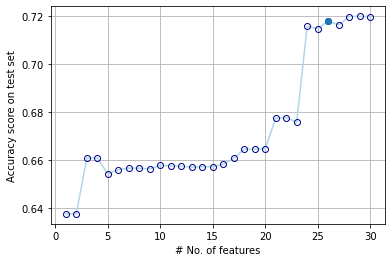

In [93]:
plt.grid()   
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1,31), acc_scores2, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,
         markeredgecolor = 'darkblue', markerfacecolor = 'None')


plt.plot(best, acc_scores[best-1], marker = 'o')
# plt.title('')

According to RFE, we should use up to the marked point in the above plot. This corresponds to 26/30 features (columns). 

Comparing the accuracy of the manual model and the RFE model, they are very close. The difference in accuracy is due to declaring the logreg model outside of the loops giving us `acc_score` and `acc_score2`.

### Naive Bayes

NB as a model is deterministic in its fitting.

according to the documentation, NB assumes the likelihood of features are normally distributed / are gaussian. Plot the features prior to check if they are indeed gaussian. normally distributed but skewed in practice. 

outliers when not normally distributed. (one large bell curve then a smaller one).

https://scikit-learn.org/stable/modules/naive_bayes.html



#### Notes

https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

Example:

    a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.
    
In relation to our data, there are no 'real' features that behave like this to provide insight whether a customer churns. 

**Bayes Classification**

$P(C|\vec{X})\propto P(\vec{X}|C)P(C) =P(X_1, X_2, ... ,X_n|C)P(C)$

Where the posterior probability is 

$P(C|\vec{X})$

being X input, C output. The conditional probability is 

$P(\vec{X}|C)$

being C input, X output. The target is 

$P(C)$



--- 

the target is the prediction. The probability of the classification. 
$\vec{X}$ are the features of the data that will be fed to the model. The conditional probability, $P(\vec{X}|C)$, is the probability we will get a classification, $C$, with given features, $\vec{X}$. Therefore, the posterior probability is the probability we will get certain features with given classification. 

For example: A rainy day will occur when these features are met: If outside is cloudy, windy and cold, it will most likely rain outside. The features are $[$cloudy, windy, cold$]$ and the classfication/prediction/outcome is $[$raining, not raining$]$. This is posterior probability. 

$$P(C|\vec{X})$$

If we know it's raining, what is the probability that it is cloudy, windy and cold? This is conditional probability. 
$$P(\vec{X}|C)$$




#### testing the model from w10

Incomplete, needed help from a consultation to understand how to use this model. 

In [84]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [82]:
# Data split
train, test= train_test_split(churn_oheClean, test_size=.2, random_state=42)

X_train = churn_oheClean.drop(columns=['churn_ind'])
y_train = churn_oheClean['churn_ind']

X_test = churn_oheClean.drop(columns=['churn_ind'])
y_test = churn_oheClean['churn_ind']

In [85]:
# Create and training a Gaussian Naive Bayes classifier model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: %.4f\n' % accuracy)

Testing accuracy is: 0.6852



### Random Forest (empty)
Probablistic fitting, maybe w11 or w12 content 